In [6]:
from scipy.io import loadmat
from scipy.signal import lfilter
import sounddevice as sd
import matplotlib.pyplot as plt
import numpy as np
import math


In [7]:
DataParole = loadmat('./DataParole.mat')
DataParole = DataParole['DataParole']
wait = input("Ajuster le volume - Puis Appuyer sur une touche du clavier pour continuer.")
sd.play(DataParole, 8192) # son emis via haut parleur externe 

Text(0.5, 1.0, 'Données de parole')

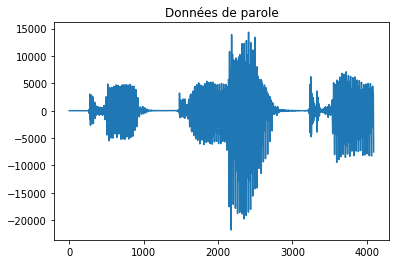

In [8]:
# Visualisation de la donnée de parole 
plt.plot(DataParole)
plt.title('Données de parole')

In [9]:
def lpc(ordre, mat):
    ys=[]
    for i in range(ordre+1):
        ys.append(np.matrix.transpose(np.array([0]*i + mat + [0]*(ordre-i))))

    array = []
    for y in ys:
        array.append(y)
    
    A = np.array(array)

    D = np.cov(A)

    E = np.matmul(-np.linalg.inv(D[0:ordre, 0:ordre]),np.matrix.transpose(D[0,1:ordre+1]))
    E1 = [1, *np.matrix.transpose(E)]

    return E1

150
[1, -0.3378167611049676, 0.6469627495049869, -0.539468132863185, 0.4825957967459905, -0.3849030622141511, 0.4954951942895959, -0.047601394982911646, 0.34732381444831617]


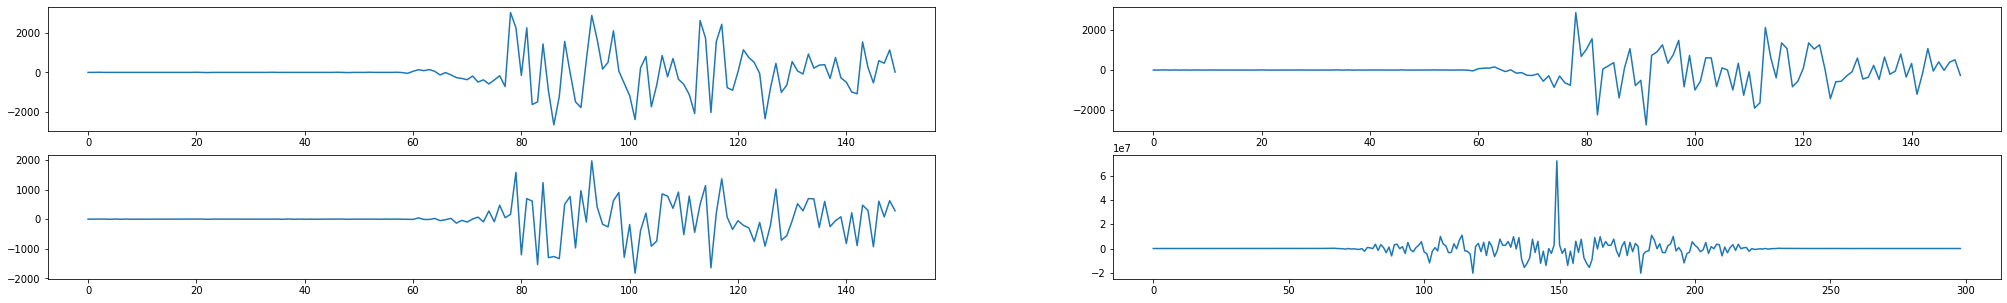

In [31]:
## Nous allons proceder a l' analyse par trames (fenetres) sur y
#   PARAMETRES D ANALYSE
# n1 et n2 sont les debut et fin de la série a analyser
n1 = 200
n2 = len(DataParole)
#
y = []
for i in DataParole[n1-1:n2-1]:
    y.append(i[0])
#
m=150; # longueur de chaque trame d analyse est m
#
NbTrames = math.floor((n2-n1+1)/m)
#
ordreAR=8;   # ordre du modele AR
#
# Premiere trame
y1 = y[0:m]
#########################
print(len(y1))
coeffsAR1=lpc(ordreAR, y1)

print(coeffsAR1)

yf1=lfilter(coeffsAR1,1,y1)

residuel = y1-yf1
residuel = np.transpose(residuel) # erreur residuelle d estimation
#########################
plt.figure(figsize=(35,5))
ax0 = plt.subplot(221)
ax0.plot(y1)
#ax0.title('Trame 1 (T1)')

ax1 = plt.subplot(222)
ax1.plot(yf1)
#ax1.title('Erreur sur T1')

ax2 = plt.subplot(223)
ax2.plot(y1-yf1)
#ax2.title('Estimee sur T1')

ax3 = plt.subplot(224)
ax3.plot(np.correlate(yf1, yf1, mode="full"))
#ax3.title('Correlation erreur sur T1')

plt.show()
#########################

C:\Users\esteb\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support 'S' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
C:\Users\esteb\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support 'y' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
C:\Users\esteb\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support 'n' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
C:\Users\esteb\AppData\Lo

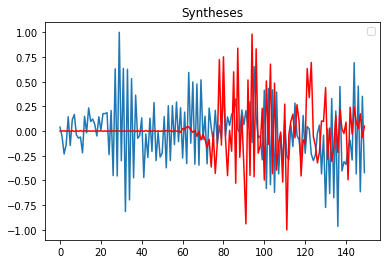

In [11]:
Synth2 = np.transpose(np.array(lfilter(coeffsAR1,1,np.random.normal(size=len(y1)))))
Synth3 = np.transpose(np.array(lfilter(coeffsAR1,1,yf1)))

plt.plot(Synth2/max(abs(Synth2)))
plt.plot(Synth3/max(abs(Synth3)),'r')
plt.title('Syntheses')
plt.legend('Synthèse par BBG', 'Synthèse par Erreur-residuelle')
plt.show()


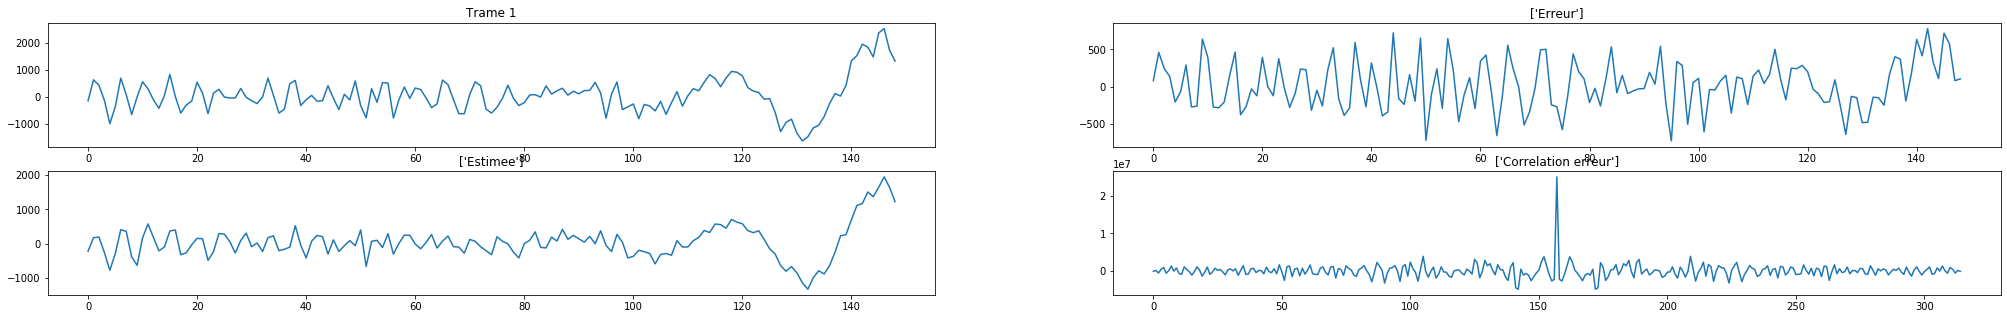

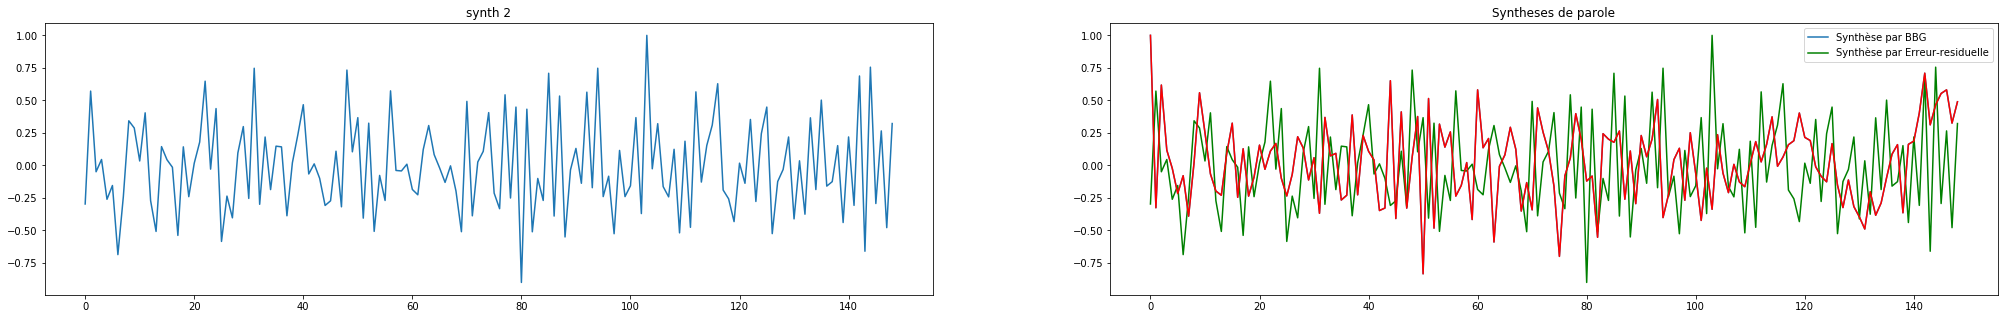

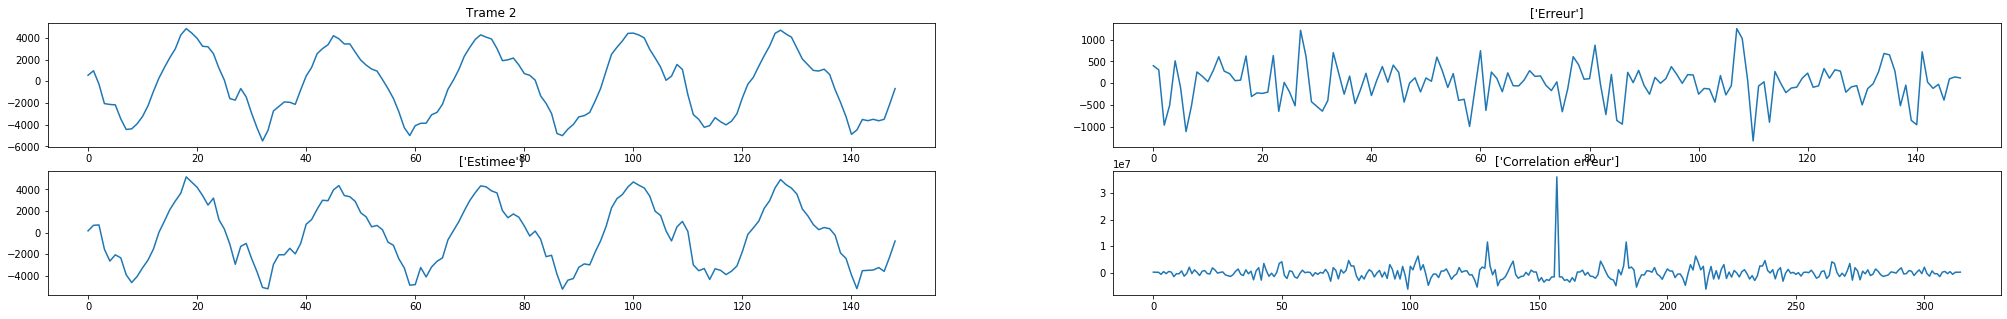

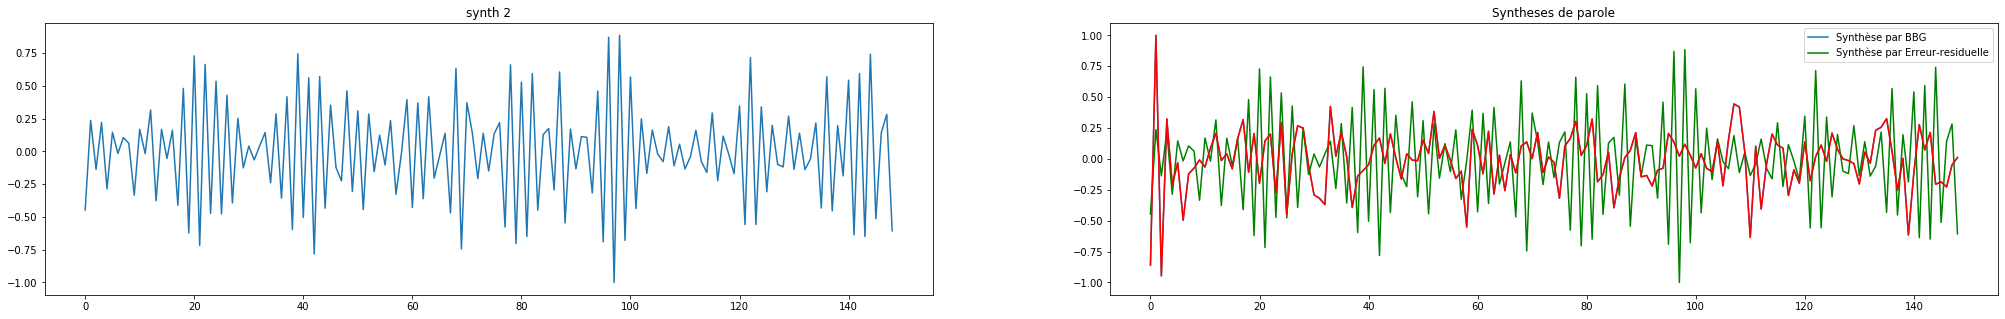

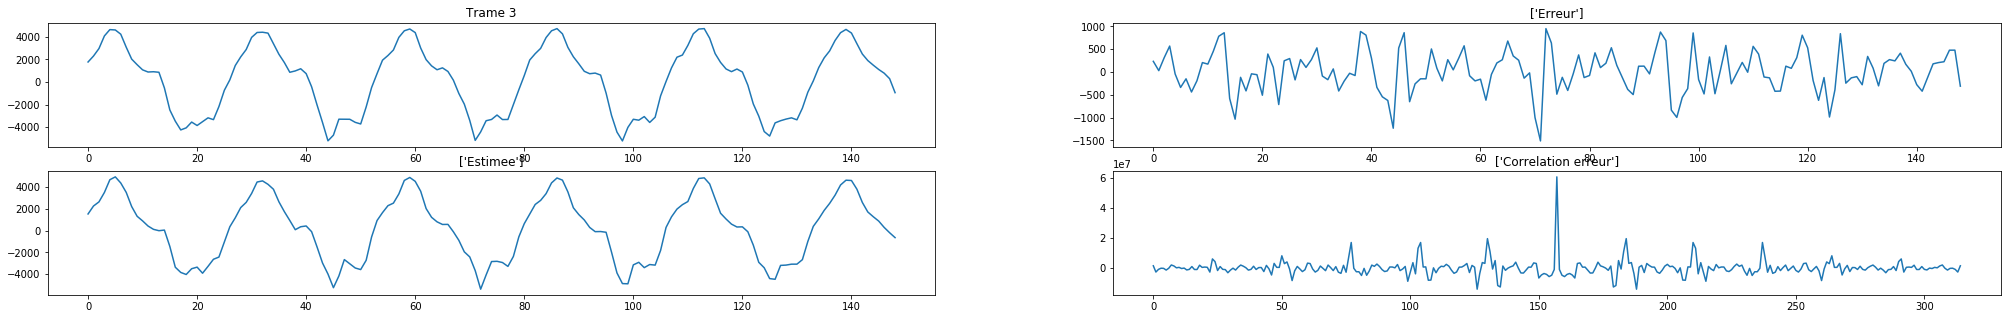

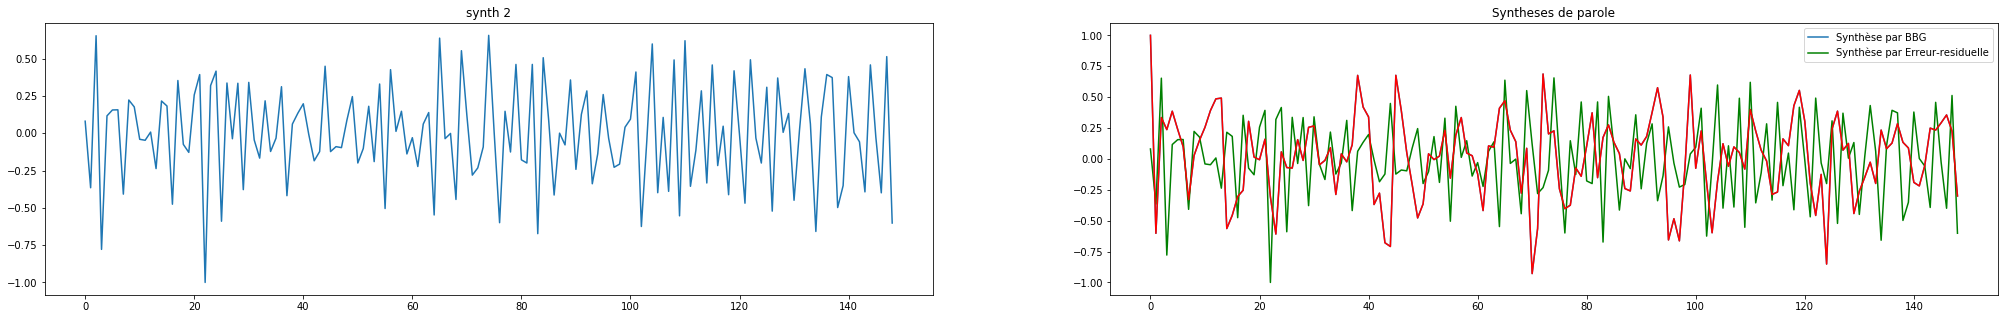

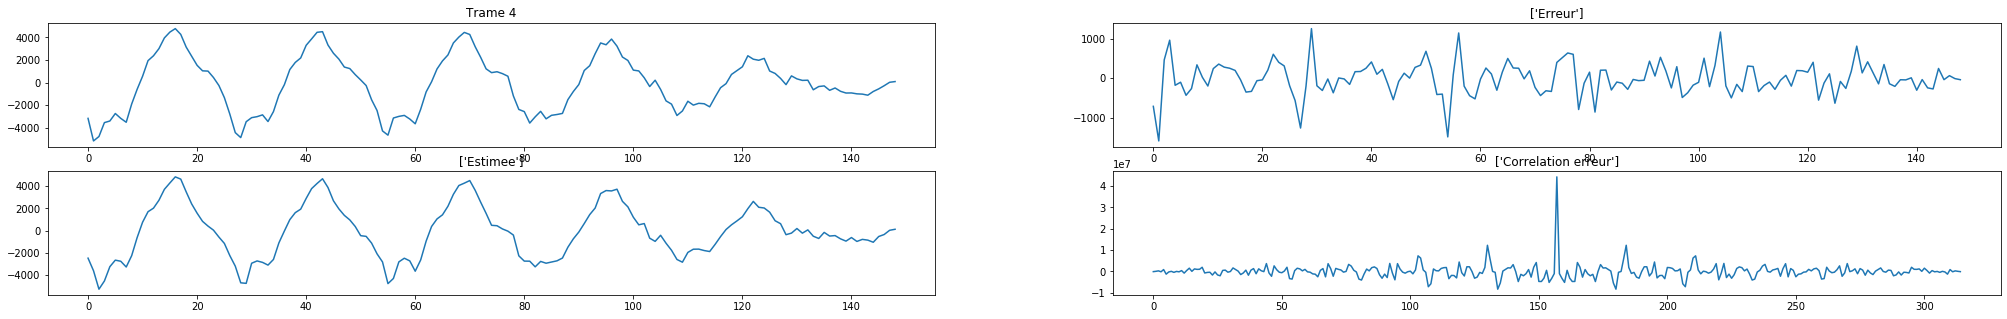

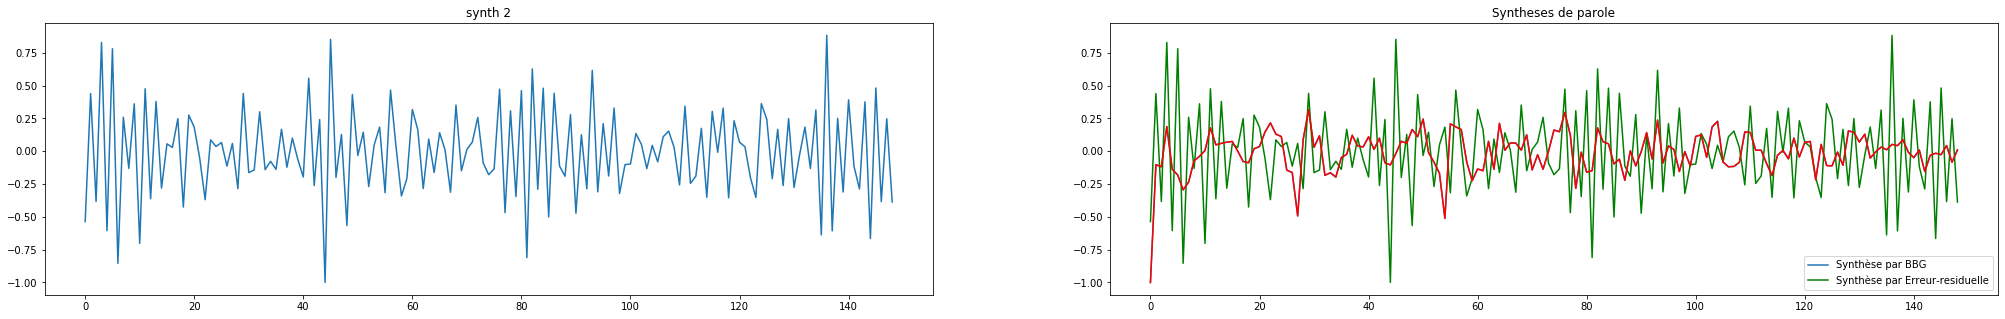

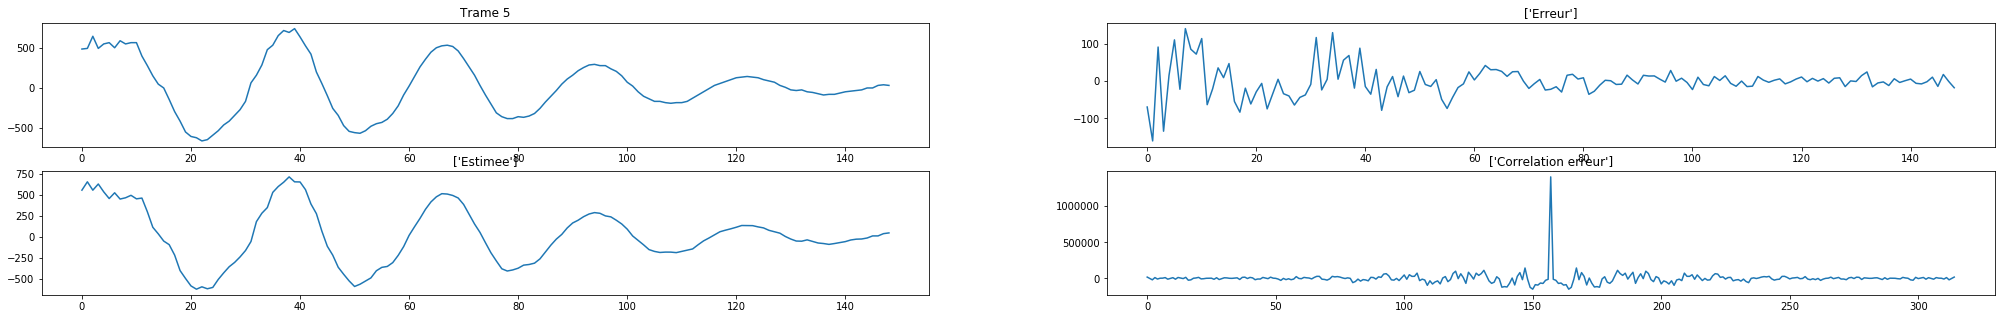

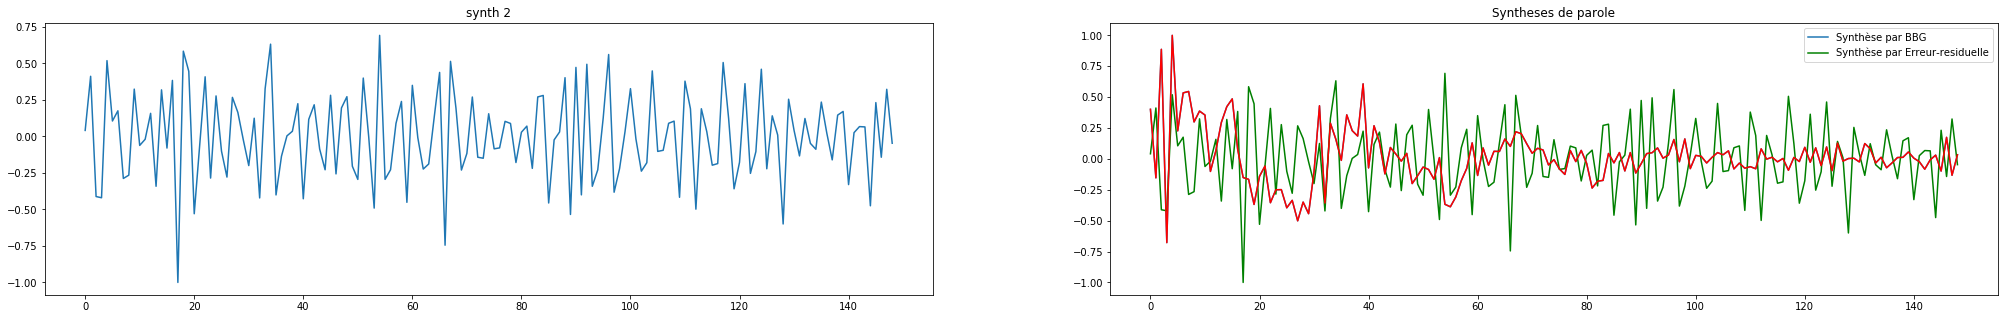

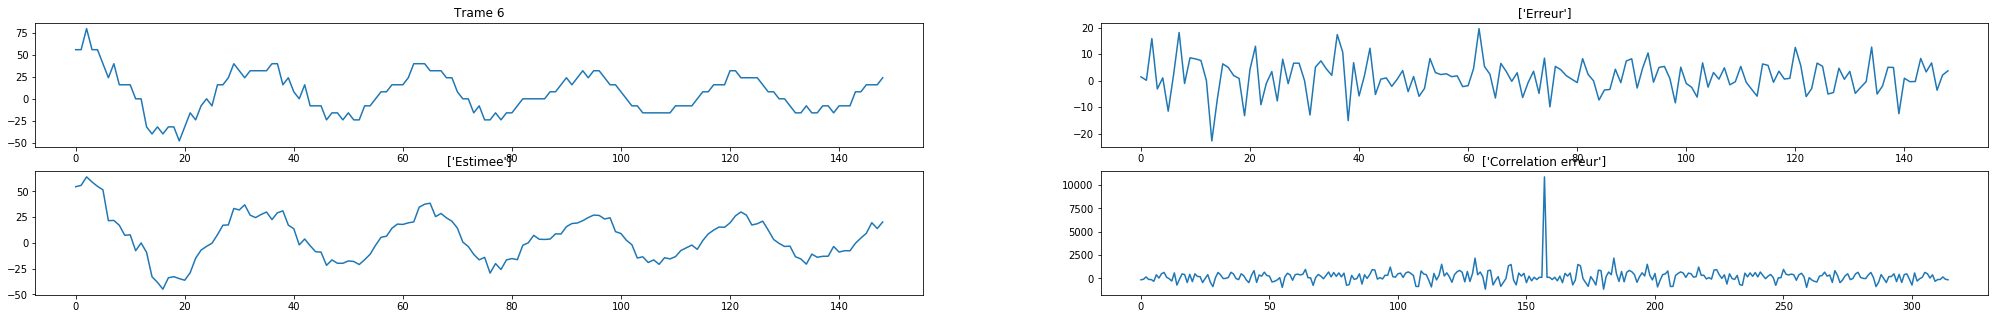

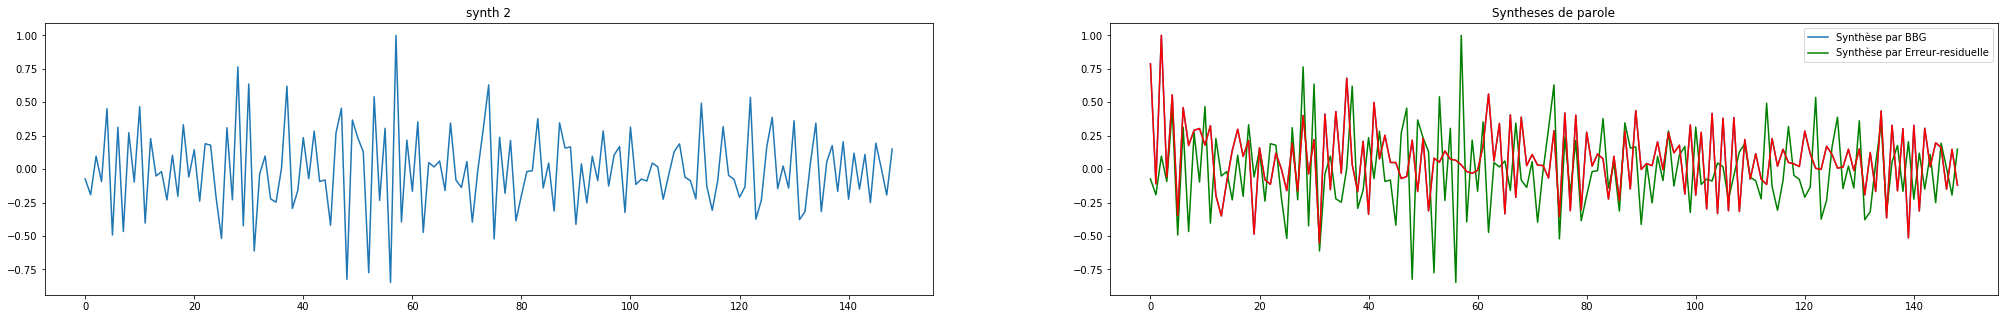

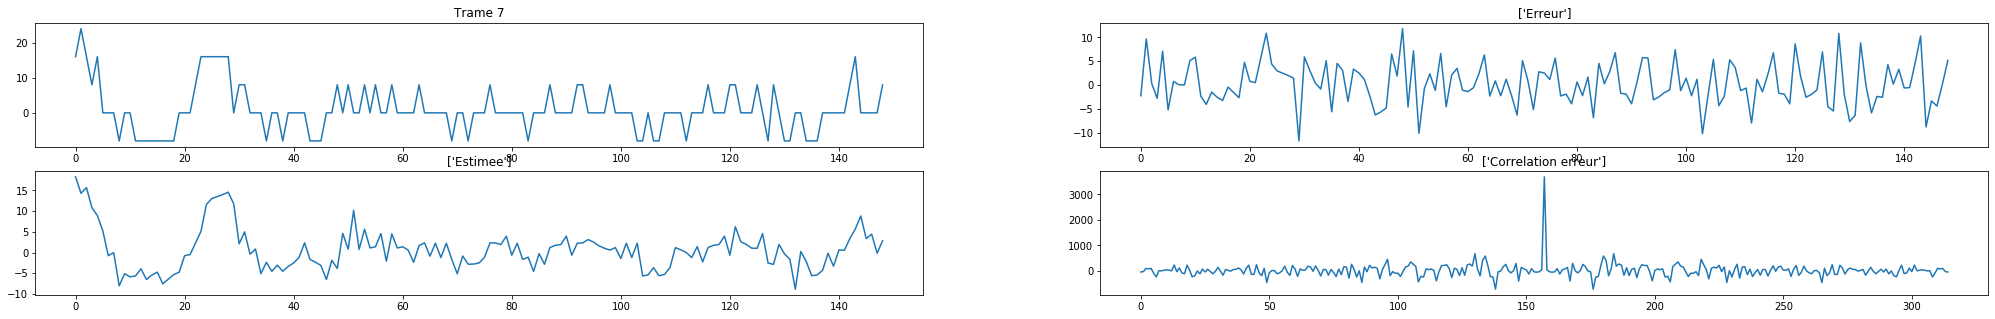

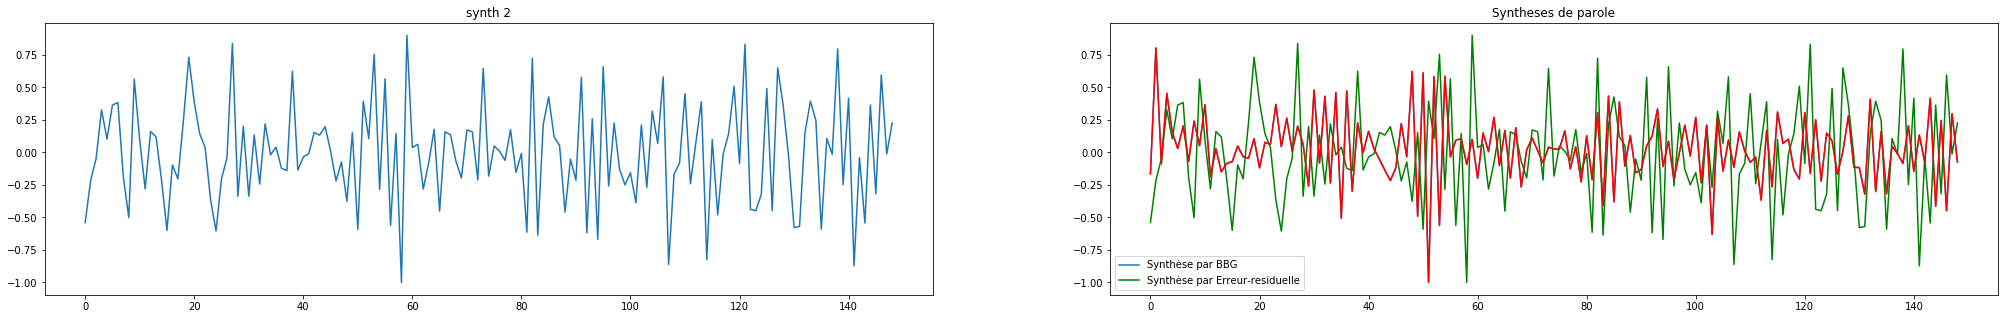

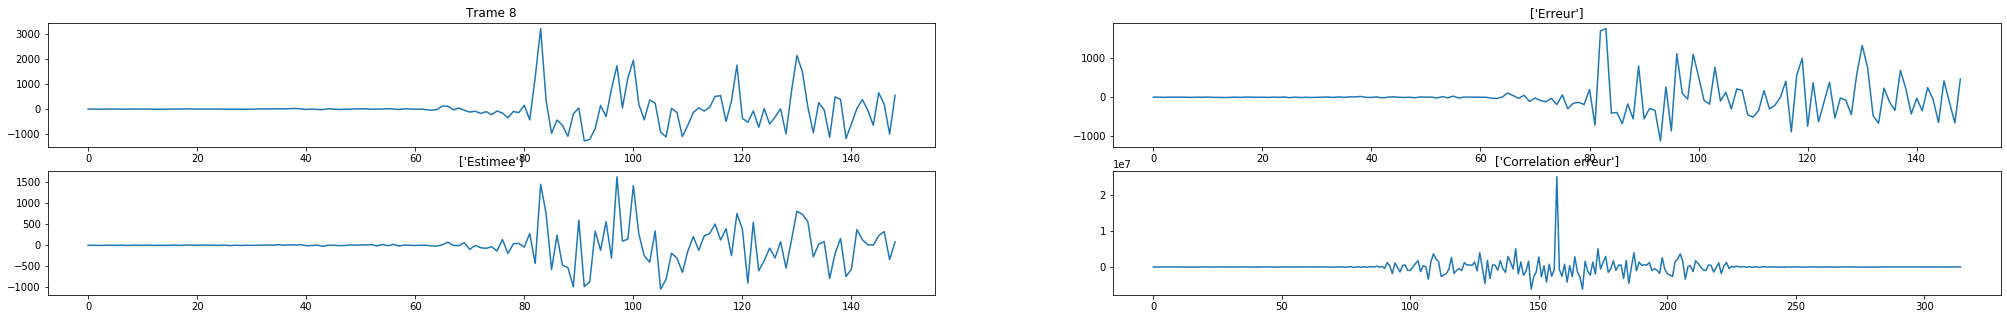

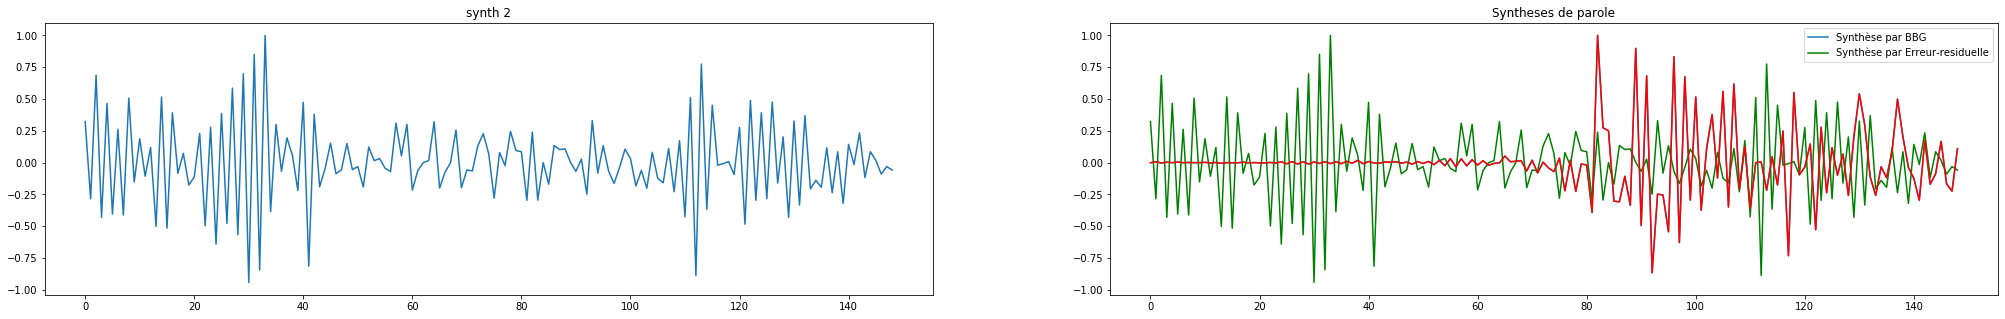

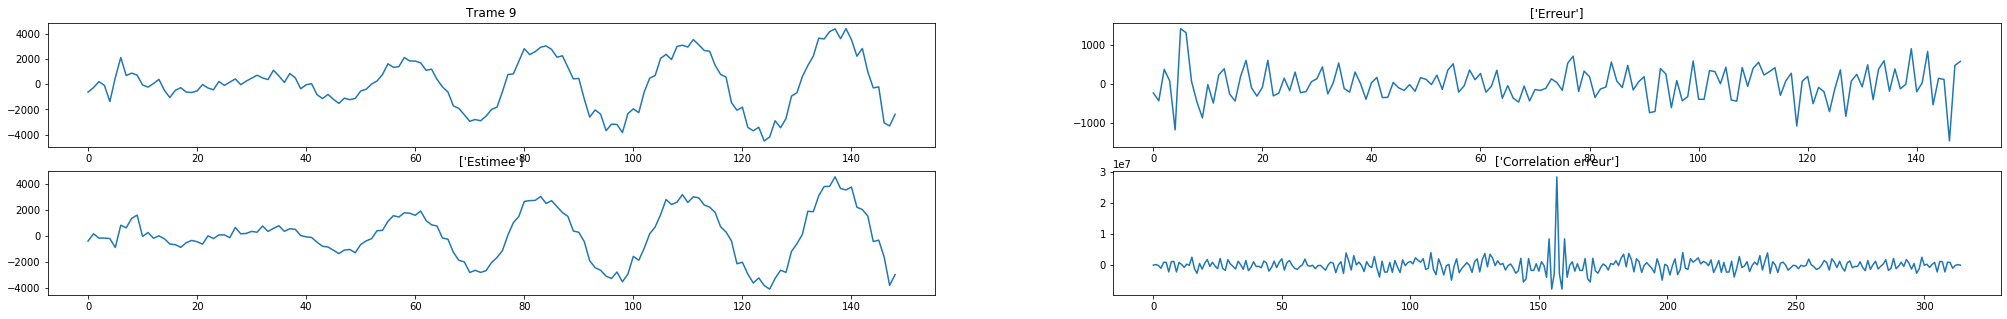

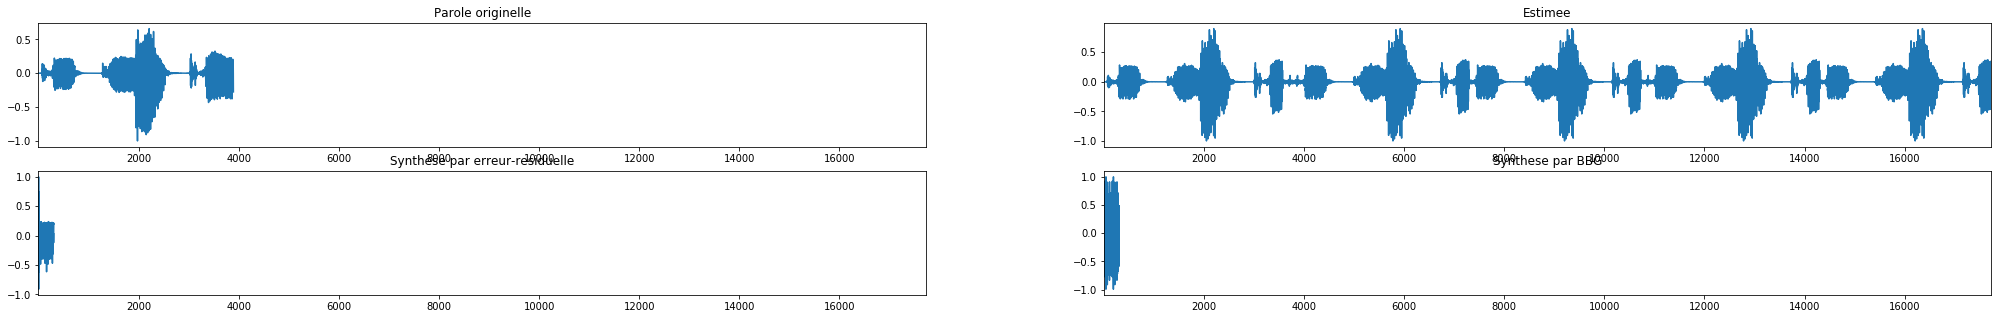

In [39]:
NbTramesAffichees = 10;  # doit etre inferieur a  NbTrames
m1=ordreAR+1; 
#########################
for k in range(1,NbTrames-1):
    y2 = y[k*m-m1+1:(k+1)*m]
    # calcul des coefficients d'un AR d'ordre n
    coeffsAR2=np.real(lpc(ordreAR,y2))
    yf2=lfilter(coeffsAR2,1,y2)
    residuel2 = y2[m1:m1+m-1]-yf2[m1:m1+m-1]
    residuel = [*residuel,*residuel2]
    Synth2 = np.array(lfilter(coeffsAR2,1,np.random.normal(size=len(y2))))
    Synth3 = np.transpose(np.array(lfilter(coeffsAR1,1,yf2)))
    synth2 = Synth2[m1:m1+m-1]
    synth3 = Synth3[m1:m1+m-1]
    Synth2 = [*Synth2,*synth2]
    Synth3 = [*Synth3,*synth3]
    if (k <= NbTramesAffichees-1):
        plt.figure(figsize=(35,5))
        ax0 = plt.subplot(221)
        ax0 = plt.plot(y2[m1:m1+m-1])
        ax0 = plt.title('Trame ' + str(k))
        ax1 = plt.subplot(222)
        ax1 = plt.plot(yf2[m1:m1+m-1])
        ax1 = plt.title(['Erreur'])
        ax2 = plt.subplot(223)
        ax2 = plt.plot(residuel2)
        ax2 = plt.title(['Estimee'])
        ax3 = plt.subplot(224)
        ax3 = plt.plot(np.correlate(yf2,yf2, mode = "full"))
        ax3 = plt.title(['Correlation erreur'])
        #plt.show()

        plt.figure(figsize=(35,5))
        ax0 = plt.subplot(121)
        ax0 = plt.plot(synth2/max(abs(synth2)))
        ax0 = plt.title('synth 2')
        ax1 = plt.subplot(122)
        ax1 = plt.plot(synth3/max(abs(synth3)))
        ax1 = plt.title('synth 3')
        plt.plot(synth2/max(abs(synth2)), "-g")
        plt.plot(synth3/max(abs(synth3)), "-r")


        plt.legend(['Synthèse par BBG', 'Synthèse par Erreur-residuelle'])
        plt.title('Syntheses de parole')
        
######
sd.play(y) # parole originelle
wait = input("Continue")
######
sd.play(residuel) # parole estim�e
wait = input("Continue")
######
sd.play(Synth3) # parole synth�tis�e avec l'erreur d'estimation
wait = input("Continue")
######
sd.play(Synth2) # parole synth�tis�e avec bruit blanc gaussien


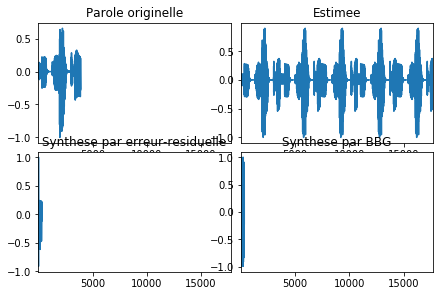

In [41]:
## Affichage de l'ensemble des traitements
L = len(residuel)
######
plt.figure()
ax0 = plt.subplot(221)
ax0.set_xlim(1,L)
ax0 = plt.plot(y[0:L]/max(abs(i) for i in y[0:L]))
ax0 = plt.title('Parole originelle')

ax1 = plt.subplot(222)
ax1.set_xlim(1,L)
ax1 = plt.plot(residuel/max(abs(i) for i in residuel))
ax1 = plt.title('Estimee')

ax2 = plt.subplot(223)
ax2.set_xlim(1,L)
ax2 = plt.plot(Synth3/max(abs(i) for i in Synth3))
ax2 = plt.title('Synthese par erreur-residuelle')

ax3 = plt.subplot(224)
ax3.set_xlim(1,L)
ax3 = plt.plot(Synth2/max(abs(i) for i in Synth2))
ax3 = plt.title('Synthese par BBG')